<a href="https://colab.research.google.com/github/projectsforstudents2022/IOT_Smoke_Detection_System/blob/main/IOT_Smoke_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import Libraries

import os
import pdb
import time
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
from os import listdir
from os.path import join, exists
from sklearn import metrics
from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Read data

df = pd.read_csv("/content/drive/MyDrive/Projects/IOT_Smoke_Detection_System/smoke_detection_iot.csv")

In [37]:
# Check data info

print(f"\033[1mData shape: \n{df.shape}\n")
print(f"Count null: \n{df.isnull().sum()}\n")
print(f"Unique values: \n {df.nunique()}\n")
df.info()
df.head()

Data shape: 
(62630, 16)

Count null: 
Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Unique values: 
 Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed:

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [38]:
# Drop useless columns and check data info again

df = df.drop(columns=["Unnamed: 0", "UTC", "CNT"])
print(f"\033[1mData shape: \n{df.shape}\n")
print(f"Count null: \n{df.isnull().sum()}\n")
print(f"Unique values: \n {df.nunique()}\n")
df.info()
df.head()

Data shape: 
(62630, 13)

Count null: 
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

Unique values: 
 Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
Fire Alarm            2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [39]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

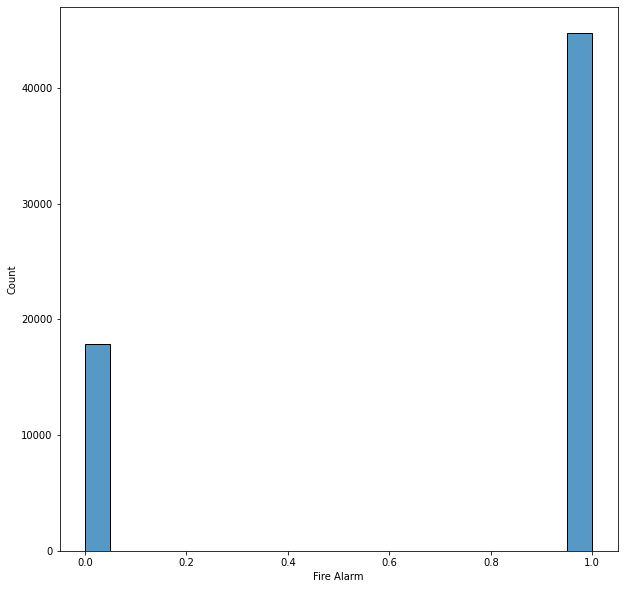

In [40]:
plt.figure(figsize=(10, 10))
sns.histplot(df['Fire Alarm'])

In [41]:
# Analyze mean, STD

df.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
Pressure[hPa],62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030
NC1.0,62630.0,203.586487,2214.738556,0.000,1.38400,1.943,2.2490,51914.680
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
NC2.5,62630.0,80.049042,1083.383189,0.000,0.03300,0.044,0.0510,30026.438


In [42]:
df.groupby('Fire Alarm')[df.keys().drop('Fire Alarm')].mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259
1,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627


In [43]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030
NC1.0,62630.0,203.586487,2214.738556,0.000,1.38400,1.943,2.2490,51914.680
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
NC2.5,62630.0,80.049042,1083.383189,0.000,0.03300,0.044,0.0510,30026.438
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Temperature[C],62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930


In [44]:
df.groupby('Fire Alarm')[df.keys().drop('Fire Alarm')].std()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,14.982932,11.962854,14255.575585,2921.749928,432.441620,956.339624,1.237957,1439.725596,2828.774776,7155.122661,3150.390163,1446.595793
1,13.825585,5.937239,548.606072,1275.260976,167.385665,307.123385,1.309030,590.458583,1493.576072,2144.942045,1689.242658,895.171419


In [45]:
df.median().sort_values(ascending=False)

Raw Ethanol       19501.000
Raw H2            12924.000
TVOC[ppb]           981.000
Pressure[hPa]       938.816
eCO2[ppm]           400.000
Humidity[%]          50.150
Temperature[C]       20.130
NC0.5                12.450
NC1.0                 1.943
PM2.5                 1.880
PM1.0                 1.810
Fire Alarm            1.000
NC2.5                 0.044
dtype: float64

In [46]:
df.groupby('Fire Alarm')[df.keys().drop('Fire Alarm')].median()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,20.54,46.14,86.0,400.0,12837.0,20158.0,937.478,1.45,1.52,9.97,1.578,0.039
1,20.02,51.40,1103.0,404.0,12933.0,19454.0,938.878,1.87,1.94,12.86,2.005,0.045


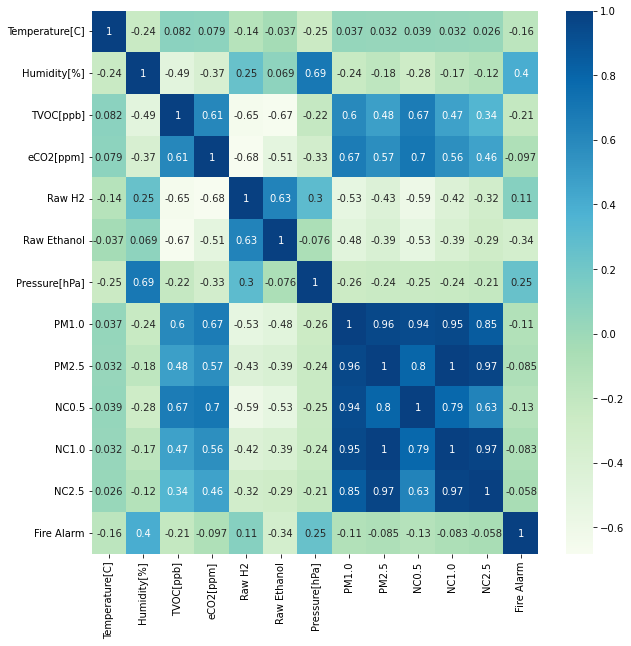

In [47]:
# Heat Map

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='GnBu')

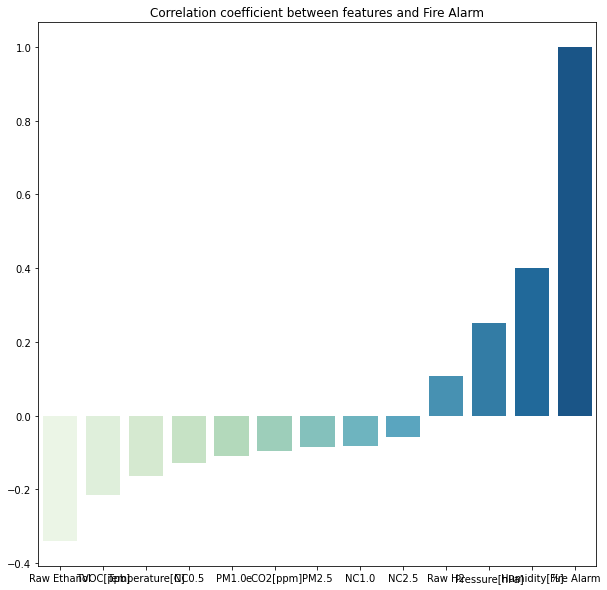

In [48]:
corr_coefs = df.corr()['Fire Alarm'].sort_values()
plt.figure(figsize=(10, 10))
plt.title("Correlation coefficient between features and Fire Alarm")
sns.barplot(x=corr_coefs.index.values.tolist(), y=corr_coefs.values.tolist(), palette='GnBu')

In [49]:
# Normalization

df = (df - np.min(df)) / (np.max(df) - np.min(df))

In [50]:
# Split dataset

X = df.copy().drop('Fire Alarm', axis=1)
Y = df.copy()['Fire Alarm']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

Train size: 50104
Test size: 12526


([<matplotlib.patches.Wedge at 0x7fcffedd8c90>,
 [Text(-0.6905429676223556, 0.8562420276226288, '0'),
  Text(0.6905429676223558, -0.8562420276226286, '1')],
 [Text(-0.3766598005212848, 0.4670411059759793, '71.6%'),
  Text(0.37665980052128495, -0.46704110597597914, '28.4%')])

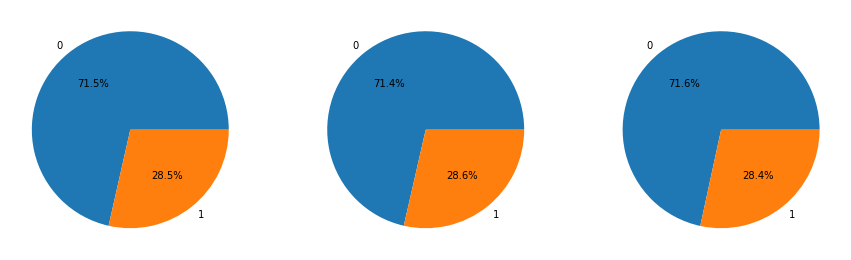

In [51]:
# Check size and distribution

print(f"Train size: {X_train.shape[0]}\nTest size: {X_test.shape[0]}")
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].pie(df['Fire Alarm'].value_counts(), labels=[0, 1], autopct='%1.1f%%')
ax[1].pie(Y_train.value_counts(), labels=[0, 1], autopct='%1.1f%%')
ax[2].pie(Y_test.value_counts(), labels=[0, 1], autopct='%1.1f%%')

In [52]:
# Extract values

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [53]:
# Implementation

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [54]:
# Binary Cross-Entropy Loss

def BCELoss(a, y):
    term_0 = y * np.log(a + 1e-8)
    term_1 = (1 - y) * np.log(1 - a + 1e-8)
    if not isinstance(y, np.ndarray):
        n = 1
    else:
        n = y.shape[0]
    return -(np.sum(term_0 + term_1) / n)

In [55]:
def gradient_descent(x, y, a, w, b):
    if not isinstance(y, np.ndarray):
        n = 1
    else:
        n = y.shape[0]
    dw = np.dot(x.T, (a - y).T) / n
    db = np.sum(a - y) / n
    return dw, db

In [56]:
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.lr = lr
    
    def update(self, t, w, b, dw, db):
        # Momentum
        self.m_dw = self.beta1 * self.m_dw + (1 - self.beta1) * dw
        self.m_db = self.beta1 * self.m_db + (1 - self.beta1) * db
        
        # Velocity
        self.v_dw = self.beta2 * self.v_dw + (1 - self.beta2) * (dw ** 2)
        self.v_db = self.beta2 * self.v_db + (1 - self.beta2) * (db ** 2)
        
        # Bias correction
        corrected_m_dw = self.m_dw / (1 - self.beta1)
        corrected_m_db = self.m_db / (1 - self.beta1)
        corrected_v_dw = self.v_dw / (1 - (self.beta2 ** 2))
        corrected_v_db = self.v_db / (1 - (self.beta2 ** 2))
        
        # Update
        w = w - self.lr * (corrected_m_dw / (np.sqrt(corrected_v_dw) + self.eps))
        b = b - self.lr * (corrected_m_db / (np.sqrt(corrected_v_db) + self.eps))
        
        return w, b

In [57]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.v_dw, self.v_db = 0, 0
        self.momentum = momentum
        self.lr = lr
    
    def update(self, t, w, b, dw, db):
        # Velocity
        self.v_dw = self.momentum * self.v_dw + self.lr * dw
        self.v_db = self.momentum * self.v_db + self.lr * db
        
        # Update
        w = w - self.v_dw
        b = b - self.v_db
        
        return w, b

In [58]:
def logistic_regression(X, Y, lr=0.01, epoch=10000, eps=0.0001, gradient_descent_method='BGD', optimizer=None, print_loss=True):
    # Initialize weights and bias
    w = np.zeros((X_train.shape[1], 1))
    b = 0
    
    # Initialize optimizer
    adam = Adam(lr=lr)
    momentum = Momentum(lr=lr)
    
    # Initialize index for SGD
    shuffled_idx = np.arange(0, X_train.shape[0])
    
    # Training Start
    global_loss = []
    for cur_epoch in range(epoch):
        # Batch Gradient Descent
        if gradient_descent_method == "BGD":
            # Predict
            A = sigmoid(np.dot(w.T, X.T) + b)

            # Calculate loss
            loss = BCELoss(A, Y)

            # Gradient descent
            dw, db = gradient_descent(X, Y, A, w, b)
            if optimizer == 'Momentum':
                    w, b = momentum.update(cur_epoch, w, b, dw, db)
            elif optimizer == 'Adam':
                w, b = adam.update(cur_epoch, w, b, dw, db)
            else:
                w = w - lr * dw
                b = b - lr * db
            
            if loss <= eps:
                break
        # Stochastic Gradient Descent
        if gradient_descent_method == "SGD":
            loss = []
            np.random.shuffle(shuffled_idx)
            for t, idx in enumerate(shuffled_idx):
                # Get data point
                x = X[idx].reshape(1, -1)
                y = Y[idx]
                
                # Predict
                a = sigmoid(np.dot(w.T, x.T) + b)
                
                # Calculate loss
                local_loss = BCELoss(a, y)
                
                # Gradient descent
                dw, db = gradient_descent(x, y, a, w, b)
                w = w - lr * dw
                b = b - lr * db
                
                loss.append(local_loss)
                if local_loss <= eps:
                    break
            loss = np.mean(loss)
        
        # Record loss for visualization and debug
        global_loss.append(loss)
        if cur_epoch % 500 == 0 and print_loss:
            print(f"Epoch {cur_epoch}, loss: {loss}")
    return w, b, global_loss

In [59]:
def predict(X, w, b):
    pred = sigmoid(np.dot(w.T, X.T) + b).reshape(-1)
    pred_score = pred.copy()
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0
    return pred, pred_score

In [60]:
def plot_loss(global_loss, title, ax):
    ax.plot(global_loss)
    ax.title.set_text(title)

In [61]:
# Prediction

accuracies = {}
f1_scores = {}
ap_scores = {}
roc_auc_scores = {}

In [62]:
# Batch Gradient Descent

w, b, BGD_loss = logistic_regression(X_train, Y_train, epoch=100, eps=0.0001, gradient_descent_method='BGD', print_loss=False)
Y_pred, Y_score = predict(X_test, w, b)
accuracies['BGD'] = metrics.accuracy_score(Y_test, Y_pred)
f1_scores['BGD'] = metrics.f1_score(Y_test, Y_pred)
ap_scores['BGD'] = metrics.average_precision_score(Y_test, Y_score)
roc_auc_scores['BGD'] = metrics.roc_auc_score(Y_test, Y_score)
print(f"Accuracy: {accuracies['BGD']}\nF1-score: {f1_scores['BGD']}\nAP-score: {ap_scores['BGD']}\nROCAUC-score: {roc_auc_scores['BGD']}")

Accuracy: 0.7160306562350311
F1-score: 0.8345196557338916
AP-score: 0.7388809226302486
ROCAUC-score: 0.607490148257831
